In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/walmart-sales-prediction/features.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_features = pd.read_csv("kaggle/input/walmart-sales-prediction/features.csv")
data_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
data_stores = pd.read_csv("kaggle/input/walmart-sales-prediction/stores.csv")
data_stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
data_test = pd.read_csv('kaggle/input/walmart-sales-prediction/test.csv')
data_test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [5]:
data_store_unique = data_stores['Type'].unique()
data_store_unique

array(['A', 'B', 'C'], dtype=object)

In [6]:
df = pd.DataFrame(data_stores)
df1= pd.DataFrame(data_features)
print(df)
print(df1)

    Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43  

In [7]:
no_of_type = df.groupby('Type')['Store'].count()
no_of_type

Type
A    22
B    17
C     6
Name: Store, dtype: int64

In [8]:
mean_of_type = df.groupby('Type')['Size'].mean()
mean_of_type

Type
A    177247.727273
B    101190.705882
C     40541.666667
Name: Size, dtype: float64

In [9]:
df1["MarkDown1"] = df1["MarkDown1"].fillna(0)
df1 = df1.fillna(0)
print(df1.Fuel_Price)
print(df1)

0       2.572
1       2.548
2       2.514
3       2.561
4       2.625
        ...  
8185    3.639
8186    3.614
8187    3.614
8188    3.737
8189    3.804
Name: Fuel_Price, Length: 8190, dtype: float64
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572       0.00       0.00   
1         1  2010-02-12        38.51       2.548       0.00       0.00   
2         1  2010-02-19        39.93       2.514       0.00       0.00   
3         1  2010-02-26        46.63       2.561       0.00       0.00   
4         1  2010-03-05        46.50       2.625       0.00       0.00   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49

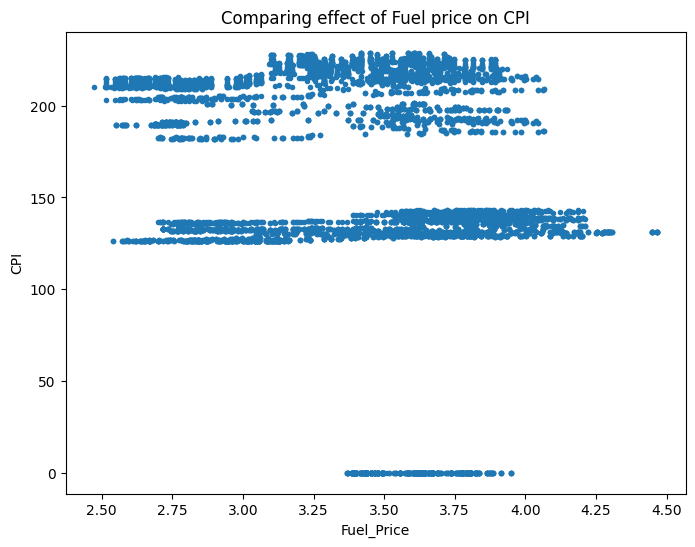

In [10]:
plt.figure(figsize = (8, 6))
plt.scatter(df1.Fuel_Price, df1.CPI, marker = '.')
plt.title("Comparing effect of Fuel price on CPI", )
plt.xlabel("Fuel_Price")
plt.ylabel("CPI")
plt.show()

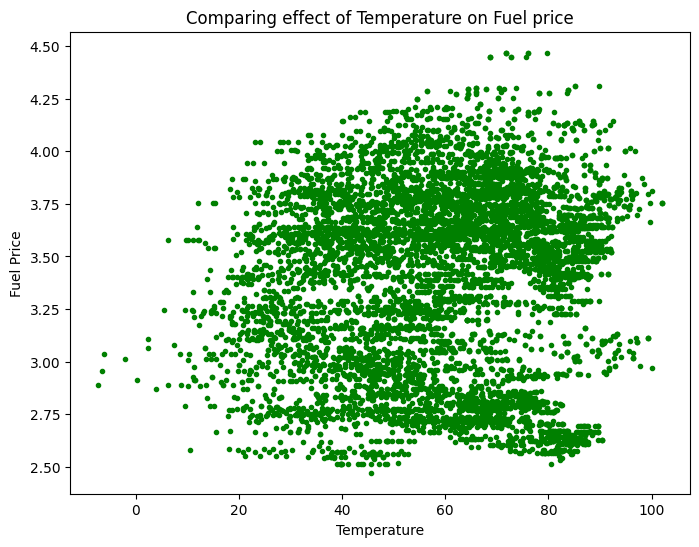

In [11]:
plt.figure(figsize = (8, 6))
plt.scatter(df1.Temperature, df1.Fuel_Price, marker = '.', color = 'green')
plt.title("Comparing effect of Temperature on Fuel price", )
plt.xlabel("Temperature")
plt.ylabel("Fuel Price")
plt.show()

In [12]:
data_train = pd.read_csv('kaggle/input/walmart-sales-prediction/train.csv')
df2 = pd.DataFrame(data_train)
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [13]:
df3 = pd.DataFrame(data_train.head(8190))
df3

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
8185,1,80,2012-01-20,16501.99,False
8186,1,80,2012-01-27,16269.33,False
8187,1,80,2012-02-03,16911.18,False
8188,1,80,2012-02-10,20426.69,True


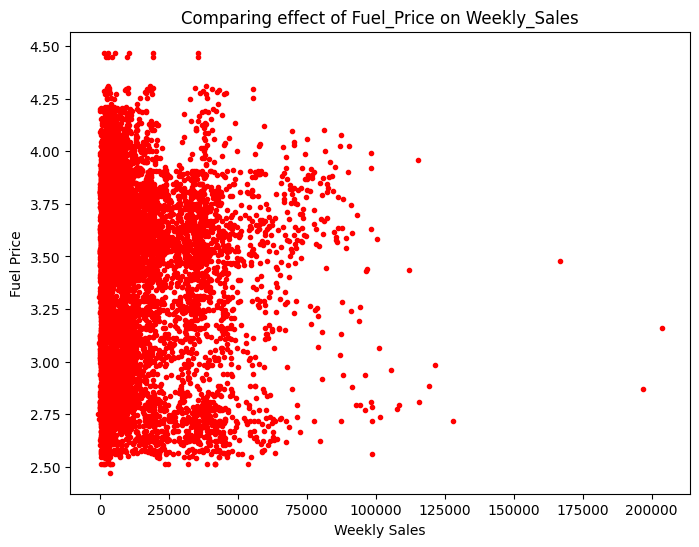

In [14]:
plt.figure(figsize = (8, 6))
plt.scatter(df3.Weekly_Sales, df1.Fuel_Price, marker = '.', color = 'red')
plt.title("Comparing effect of Fuel_Price on Weekly_Sales", )
plt.xlabel("Weekly Sales")
plt.ylabel("Fuel Price")
plt.show()

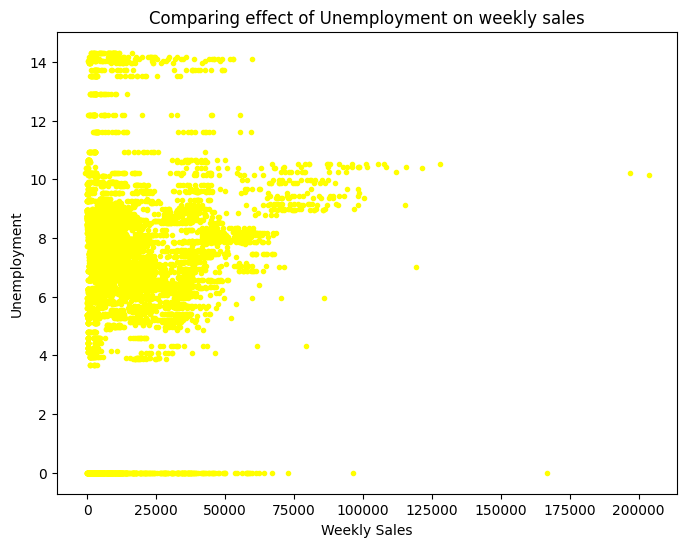

In [15]:
plt.figure(figsize = (8, 6))
plt.scatter(df3.Weekly_Sales, df1.Unemployment, marker = '.', color = 'yellow')
plt.title("Comparing effect of Unemployment on weekly sales", )
plt.xlabel("Weekly Sales")
plt.ylabel("Unemployment")
plt.show()

In [16]:
df2['IsHoliday'] = df2['IsHoliday'].map({True:1,False:0})
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0
421566,45,98,2012-10-05,628.10,0
421567,45,98,2012-10-12,1061.02,0
421568,45,98,2012-10-19,760.01,0


In [17]:
df4 = df2.groupby('IsHoliday')['Weekly_Sales'].mean()
df4

IsHoliday
0    15901.445069
1    17035.823187
Name: Weekly_Sales, dtype: float64

In [18]:
df2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [19]:
df5 = pd.DataFrame(df2.groupby('Store')['Weekly_Sales'].mean())
print(df5)
print(df5.columns)

       Weekly_Sales
Store              
1      21710.543621
2      26898.070031
3       6373.033983
4      29161.210415
5       5053.415813
6      21913.243624
7       8358.766148
8      13133.014768
9       8772.890379
10     26332.303819
11     19276.762751
12     14867.308619
13     27355.136891
14     28784.851727
15      9002.493073
16      7863.224124
17     12954.393636
18     15733.313136
19     20362.126734
20     29508.301592
21     11283.435496
22     15181.218886
23     19776.180881
24     18969.106500
25     10308.157810
26     14554.129672
27     24826.984536
28     18714.889803
29      8158.810609
30      8764.237719
31     19681.907464
32     16351.621855
33      5728.414053
34     13522.081671
35     13803.596986
36      8584.412563
37     10297.355026
38      7492.478460
39     21000.763562
40     13763.632803
41     17976.004648
42     11443.370118
43     13415.114118
44      6038.929814
45     11662.897315
Index(['Weekly_Sales'], dtype='object')


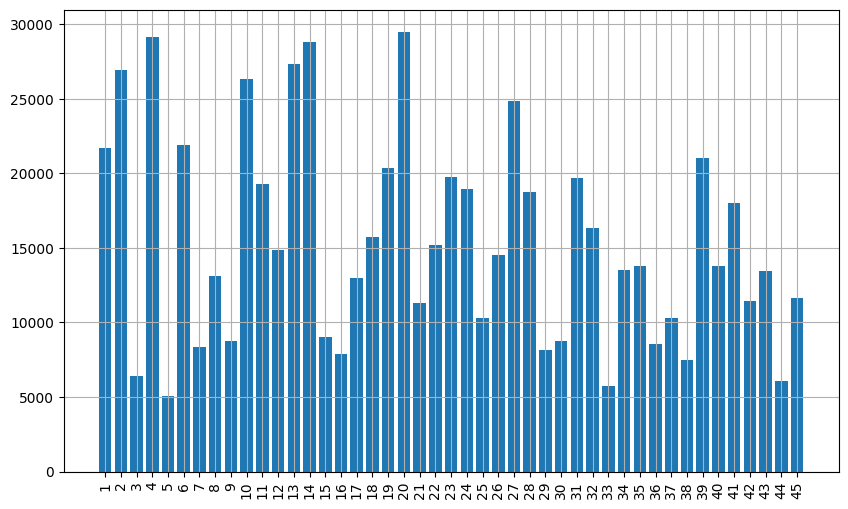

In [20]:
plt.figure(figsize=(10,6))
plt.bar( df5.index, df5['Weekly_Sales'])
plt.xticks(df5.index, rotation=90)
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error

data = pd.read_excel("kaggle/input/walmart-sales-prediction/Sample - Superstore.xls")
data = pd.DataFrame(data)
data 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [22]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
# print(data['Order Date'])
sort_data = data.sort_values(by='Order Date').reset_index()
sort_data['Order Date']
sort_data= sort_data.drop('index', axis=1)
sort_data = sort_data.drop(['Ship Mode', 'Customer ID', 'Customer Name', 'Order ID','Postal Code', 'Region','Row ID','Product ID','Ship Date','Product Name'], axis=1)
sort_data.head(16)

,Order Date,Segment,Country,City,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2014-01-03,Consumer,United States,Houston,Texas,Office Supplies,Paper,16.448,2,0.2,5.5512
1,2014-01-04,Home Office,United States,Naperville,Illinois,Office Supplies,Labels,11.784,3,0.2,4.2717
2,2014-01-04,Home Office,United States,Naperville,Illinois,Office Supplies,Storage,272.736,3,0.2,-64.7748
3,2014-01-04,Home Office,United States,Naperville,Illinois,Office Supplies,Binders,3.540,2,0.8,-5.4870
4,2014-01-05,Consumer,United States,Philadelphia,Pennsylvania,Office Supplies,Art,19.536,3,0.2,4.8840
5,2014-01-06,Home Office,United States,Henderson,Kentucky,Office Supplies,Art,5.480,2,0.0,1.4796
6,2014-01-06,Home Office,United States,Henderson,Kentucky,Furniture,Chairs,2573.820,9,0.0,746.4078
7,2014-01-06,Home Office,United States,Henderson,Kentucky,Office Supplies,Binders,609.980,2,0.0,274.4910
8,2014-01-06,Corporate,United States,Athens,Georgia,Office Supplies,Art,12.780,3,0.0,5.2398
9,2014-01-06,Home Office,United States,Henderson,Kentucky,Technology,Phones,391.980,2,0.0,113.6742


In [24]:
columns_to_combine = ['Category', 'Sub-Category', 'Country', 'City', 'State', 'Segment']  # Categorical columns
columns_to_sum = ['Sales', 'Quantity']  # Numerical colums to sum
columns_to_mean = ['Discount', 'Profit']

agg_data = data.groupby('Order Date').agg({
    **{col: ', '.join for col in columns_to_combine},  # Concatenate categorical columns
    **{col: 'sum' for col in columns_to_sum},
    **{col: 'mean' for col in columns_to_mean}})

print(agg_data.head(16))
print(agg_data.columns)
df2

                                                     Category  \
Order Date                                                      
2014-01-03                                    Office Supplies   
2014-01-04  Office Supplies, Office Supplies, Office Supplies   
2014-01-05                                    Office Supplies   
2014-01-06  Office Supplies, Office Supplies, Furniture, O...   
2014-01-07                         Furniture, Office Supplies   
2014-01-09                        Office Supplies, Technology   
2014-01-10                         Office Supplies, Furniture   
2014-01-11                                          Furniture   
2014-01-13  Office Supplies, Office Supplies, Technology, ...   
2014-01-14                                          Furniture   
2014-01-15                                         Technology   
2014-01-16  Furniture, Technology, Office Supplies, Office...   
2014-01-18                                    Office Supplies   
2014-01-19  Office Suppli

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0
421566,45,98,2012-10-05,628.10,0
421567,45,98,2012-10-12,1061.02,0
421568,45,98,2012-10-19,760.01,0


In [25]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f
from sklearn.metrics import mean_squared_error, root_mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

# X = sort_data['Discount', ]
# y = sort_data['Sales']
# X= pd.DataFrame(df2.drop(columns =['Date','Weekly_Sales']))
X = pd.DataFrame(df2['IsHoliday'])
y= pd.DataFrame(df2['Weekly_Sales'])
X,y

(        IsHoliday
 0               0
 1               1
 2               0
 3               0
 4               0
 ...           ...
 421565          0
 421566          0
 421567          0
 421568          0
 421569          0
 
 [421570 rows x 1 columns],
         Weekly_Sales
 0           24924.50
 1           46039.49
 2           41595.55
 3           19403.54
 4           21827.90
 ...              ...
 421565        508.37
 421566        628.10
 421567       1061.02
 421568        760.01
 421569       1076.80
 
 [421570 rows x 1 columns])

In [26]:
# X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
# model = xgb.XGBRFRegressor(objective='reg:squarederror',
#                          n_estimators=1000,
#                          max_depth=7,
#                          eta=0.1,
#                         enable_categorical = True)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)

# plt.scatter(y_test, pred)
# plt.show()

# print(pred)

In [27]:
# # mod = LinearRegression()
# mod1= KNeighborsRegressor()

# pipe = Pipeline([
#     ("scale", StandardScaler()),
#     ("model", KNeighborsRegressor(n_neighbors=1))
# ])
# # pipe.fit(X_train, y_train)
# pipe.fit(X_train, y_train)

# # pred = pipe.predict(X_test)
# pred1 = pipe.predict(X_test)

# # plt.scatter(y_test, pred)
# plt.scatter(y_test, pred1, c='red')
# plt.show()

In [64]:
data = pd.read_csv("kaggle//input//walmart-sales-prediction//Walmart.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [65]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


ValueError: `bins` must increase monotonically, when an array

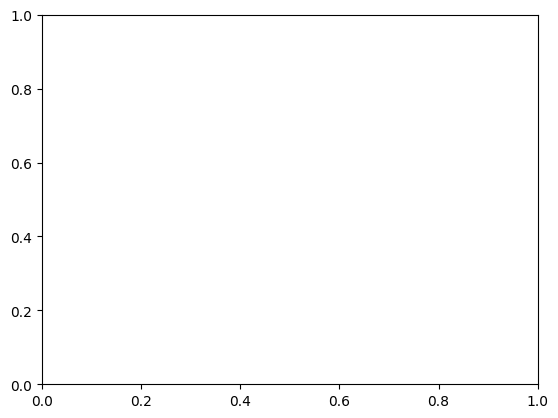

In [87]:
plt.hist(data['Temperature'], data['Weekly_Sales'], bin=20)
plt.show()

In [66]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")
week = pd.to_datetime(data['Date'], format="%d-%m-%Y").dt.isocalendar().week
month = pd.to_datetime(data['Date'], format="%d-%m-%Y").dt.month

data['week']=week
data['month']= month
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,10


In [67]:
data1 = data.drop(columns='Date', axis=1)
X = data1.drop(columns='Weekly_Sales')
y = data1['Weekly_Sales']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.var(axis=0)

Store            168.737596
Holiday_Flag       0.062705
Temperature      341.291446
Fuel_Price           0.2087
CPI             1541.640129
Unemployment       3.508861
week             199.895015
month             10.500082
dtype: Float64

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

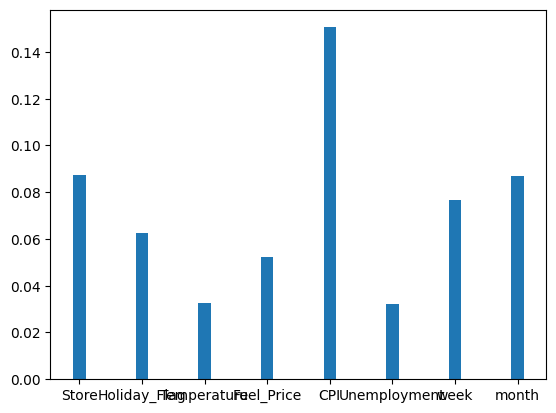

In [70]:
x = X.columns
y = X_train_scaled.var(axis=0)

plt.bar(x,y,width=0.2)
plt.show()

In [82]:
X_train_dropped = X_train.drop(columns=['Temperature','Unemployment','Fuel_Price','Holiday_Flag'])
X_test_dropped = X_test.drop(columns=['Temperature','Unemployment','Fuel_Price','Holiday_Flag'])
X_test_dropped

,Store,CPI,week,month
2436,18,131.784000,10,3
3361,24,135.265267,25,6
233,2,217.325182,43,10
3667,26,136.461806,45,11
5011,36,209.980321,11,3
...,...,...,...,...
2600,19,132.614193,31,8
6308,45,182.046418,21,5
6292,45,181.871190,5,2
151,2,210.479887,13,4


0.6663411273388801


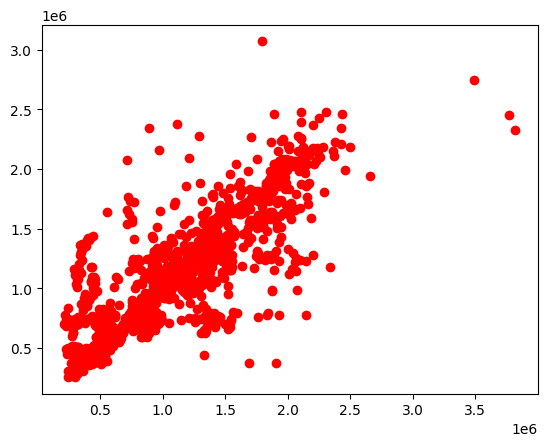

In [83]:
mod= KNeighborsRegressor()

pipe = Pipeline([
    ("scale", MinMaxScaler()),
    ("model", KNeighborsRegressor(n_neighbors=3))
])

pipe.fit(X_train_dropped, y_train)

pred = pipe.predict(X_test_dropped)

r2 = r2_score(y_test, pred)
print(r2)

plt.scatter(y_test, pred, c='red')
plt.show()

In [85]:
import pickle as pk

pk.dump(pipe, open("RegModel.pkl", 'wb'))

In [84]:
pipe.predict(pd.DataFrame([[8,200, 55, 3]], columns=['Store','CPI', 'week','month']))

array([642071.72666667])